# FEATURE TRANSFORMATION 

### Why do we need Gaussian Transformation of all features?
 Models like Linear and Logistic assume that variables are normally distributed. But other models benefit from Gaussian- like distributions. Thus Gausian distributed variables may boost the ML algorithms performance.
 
 If a variable is not normally distributed, it is possible to find a mathematical transformation so that the transformed variable is Gaussian. 


### Types of transformation:
1. Logarithmic Transformation
2. Reciprocal Transformation
3. Square Root Transformation
4. Exponential Transformation
5. Box cox Transformation
6. Yeo Johnson Transformation

Cred: Python Feature Engineering Cookbook by Packt

### Linear /Logistic Regression Assumptions:
1. Linear rship with the dependent variable/outcome  Y
2. Multivariate normality
3. No or little multicollinearity
4. Homoscedasticity

Refer this for more insights : https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0

Other models, do not rely on this assumptions. We should only use gaussian transformation only when we are using linear/logistic regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats


## Load Dataset

In [2]:
use_cols = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp','Survived']

data = pd.read_csv(r'titanic.csv', usecols=use_cols)


In [3]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500


In [4]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Fare          0
dtype: int64

In [5]:
# Create a function impute_NA to replace the NAN values of AGE with random sampling
def impute_na(data, variable):
    
    df = data.copy()
    df[variable+'_random'] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    
    return df[variable+'_random']

In [6]:
data['Age']=impute_na(data,'Age')

In [7]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
dtype: int64

# Q-Q plot

In [9]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

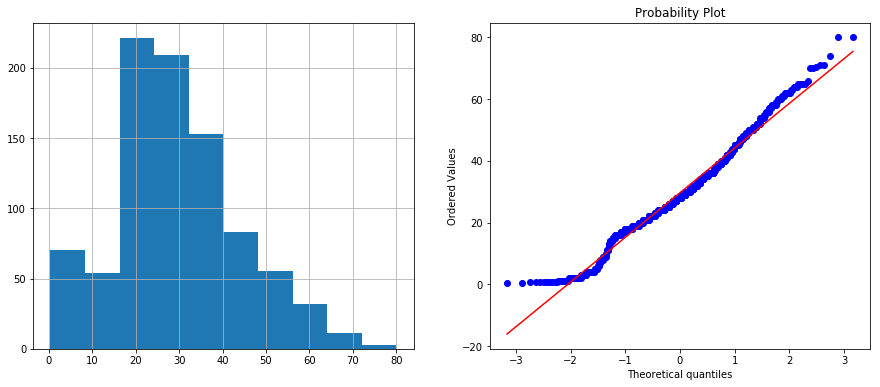

In [10]:
#data is normally distributed
diagnostic_plots(data, 'Age')

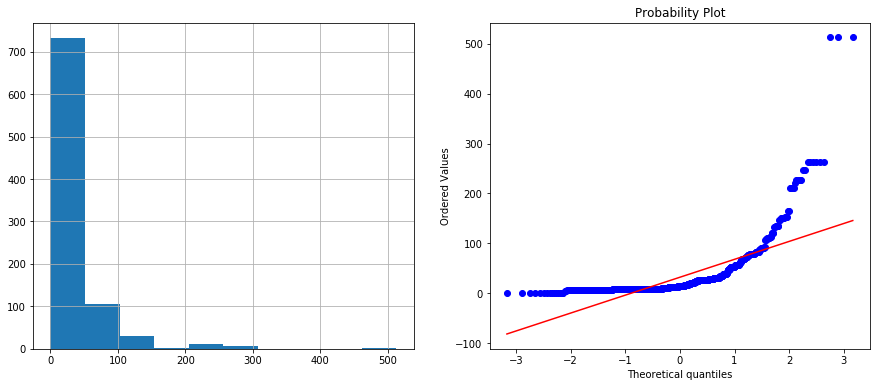

In [11]:
# data is not normally distributed
diagnostic_plots(data, 'Fare')

## Logarithmic transformation

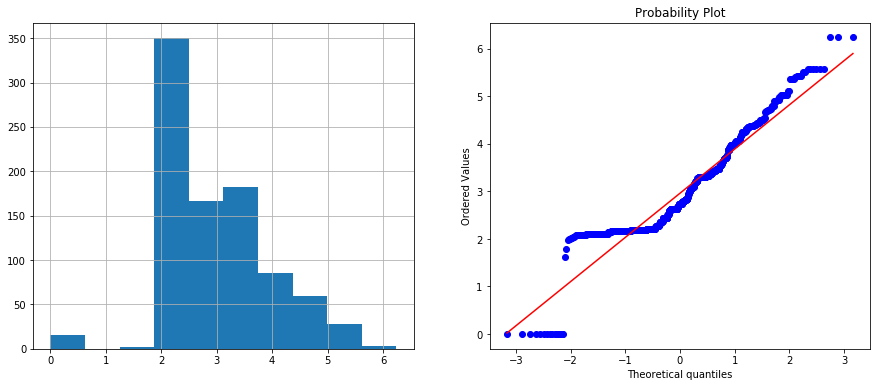

In [16]:
# add the new created feature
data['Log_Fare']=np.log(data['Fare']+1)
diagnostic_plots(data,'Log_Fare')

## Reciprocal transformation

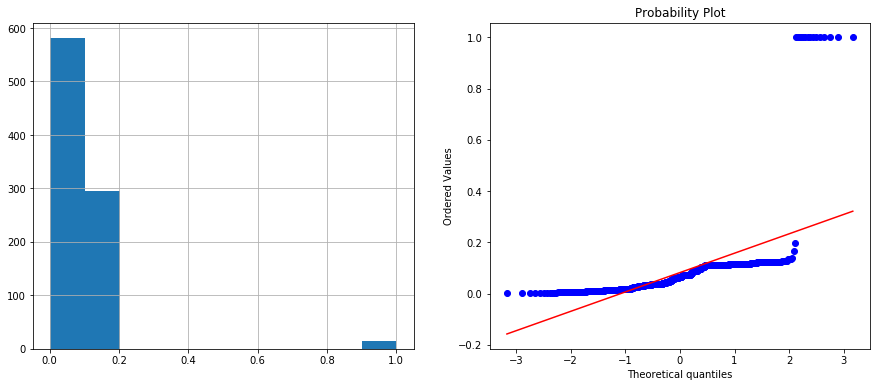

In [17]:
data['Reciprocal_Fare']=np.reciprocal(data['Fare']+ 1)
diagnostic_plots(data,'Reciprocal_Fare')


#data['Rec_Fare']=1/(data['Fare']+1)
#diagnostic_plots(data,'Rec_Fare')

## Square root / cube root transformation

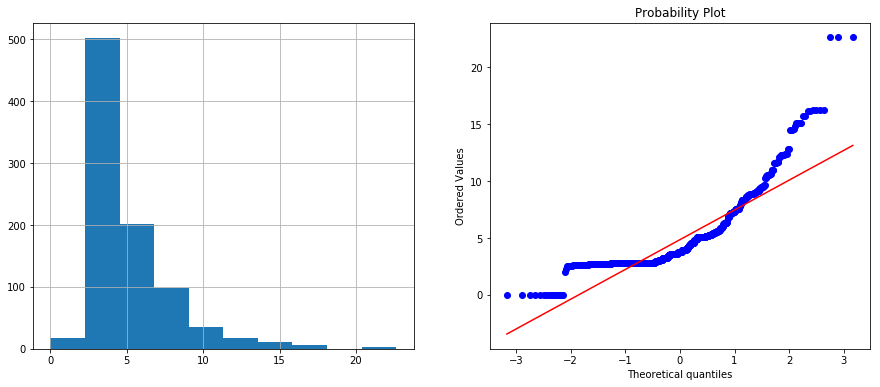

In [18]:
data['sqr_Fare']=np.sqrt(data['Fare'])
diagnostic_plots(data,'sqr_Fare')



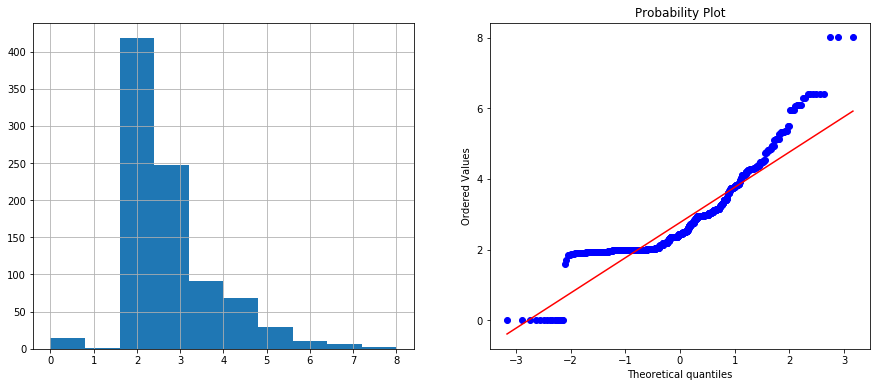

In [19]:
data['cube_Fare']=np.cbrt(data['Fare'])
diagnostic_plots(data,'cube_Fare')

## Exponential transformation

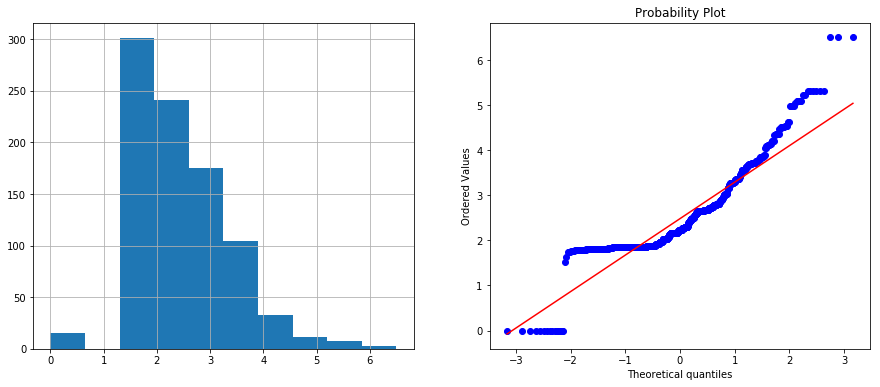

In [23]:
data['Exp_Fare']=np.power(data['Fare'],0.3)
diagnostic_plots(data,'Exp_Fare')

## Box-cox transformation

Optimal lambda:  -0.09778702818680361


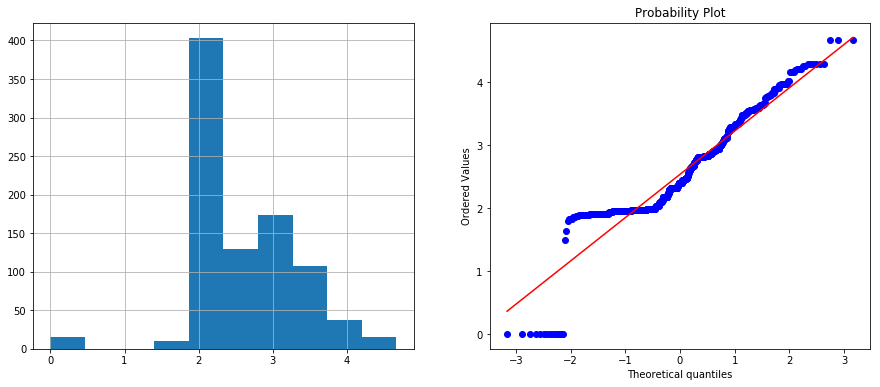

In [24]:
data['Fare_boxcox'], param = stats.boxcox(data['Fare']+1) # you can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(data, 'Fare_boxcox')

## Yeo Johnson transformation

Optimal lambda:  -0.22190747987069545


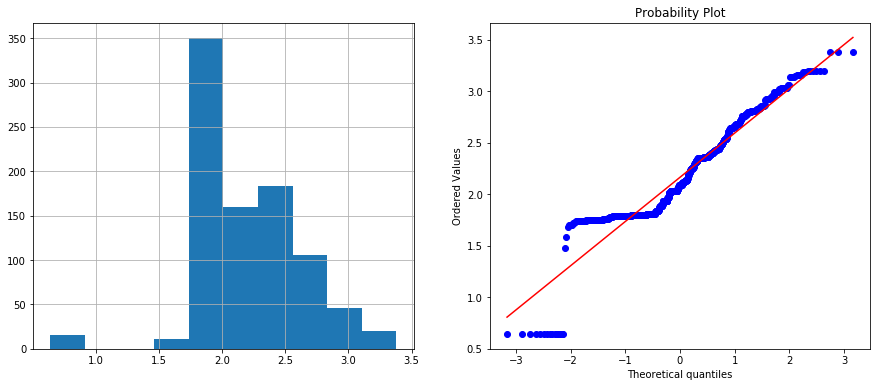

In [26]:
data['Fare_yeo'], param = stats.yeojohnson(data['Fare']) # you can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(data, 'Fare_yeo')